https://github.com/storopoli/topic-modelling

https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5    

https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

https://medium.com/@yanlinc/how-to-build-a-lda-topic-model-using-from-text-601cdcbfd3a6

https://methods.sagepub.com/base/download/DatasetHowToGuide/latent-dirichlet-allocation-in-news-2016-python

https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5

In [1]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

C:\Users\mwamb\Anaconda3\lib\site-packages\past\builtins\misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [2]:
def file_reader(file):
    pages = p.PdfFileReader(file)
    p_numbers = pages.getNumPages()
    text = ""
    
    for p_number in range(p_numbers):
        page = pages.getPage(p_number)
        text += page.extractText()
        
    return text

In [3]:
import PyPDF2 as p

UNICEF_text = file_reader("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/UNICEF/UNICEF_result.pdf")


In [4]:
UNICEF_text.lower()

"www.thelancet.com/lancetgh \n  vol 7   july 2019\n e849national, regional, and worldwide estimates of low \nbirthweight in 2015, with trends from 2000: a systematic \n\nanalysishannah blencowe, julia krasevec, mercedes de onis, robert e black, xiaoyi an, gretchen a stevens, elaine borghi, chika hayashi, diana estevez, \nluca cegolon, suhail shiekh, victoria ponce hardy, joy e lawn*, simon cousens*\nsummarybackground low birthweight (lbw) of less than 2500 g is an important marker of maternal and fetal health, predicting mortality, stunting, and adult-onset chronic conditions. global nutrition targets set at the world health assembly in \n2012 include an ambitious 30% reduction in lbw prevalence between 2012 and 2025. estimates to track progress \ntowards this target are lacking; with this analysis, we aim to assist in setting a baseline against which to assess \nprogress towards the achievement of the world health assembly targets.\nmethods we sought to identify all available lbw inpu

In [5]:
type(UNICEF_text)

str

In [6]:
import spacy
from nltk.corpus import stopwords
sp = spacy.load('en_core_web_sm')

#stopwords = sp.Defaults.stop_words
#stopwords.words('english') + ('though','www','https','and/or','iv','|','v','puff','Œ','viii','da','ix','cc','by','nc','sa','igo','2019','2018')

from nltk.corpus import stopwords
stoplist = stopwords.words('english') + ['though','www','https','and/or','iv','|','v','puff','Œ','viii','da','ix','cc','by','nc',
 'sa','igo','2019','2018','(',')','©Shutterstock/Valeriya','Anufriyeva','//creativecommons.org/licenses/by-nc-sa/3.0/igo','BY-NC-SA', 
'xACKNOWLEDGEMENTS', 'iii','%', '<',  '>', '*', 'n.r','insecurityTotalTotalTotalTotalTotal47.648.328.58.78.58.0|','//iresearch.worldbank.org/PovcalNet/home.aspx',
                                       'ii', 'viiMETHODOLOGY' ]



In [7]:
type(UNICEF_text)

str

In [8]:
Sent = nltk.word_tokenize(UNICEF_text)
print(nltk.pos_tag(Sent))

[('www.thelancet.com/lancetgh', 'NN'), ('Vol', 'NNP'), ('7', 'CD'), ('July', 'NNP'), ('2019', 'CD'), ('e849National', 'NN'), (',', ','), ('regional', 'JJ'), (',', ','), ('and', 'CC'), ('worldwide', 'JJ'), ('estimates', 'NNS'), ('of', 'IN'), ('low', 'JJ'), ('birthweight', 'NN'), ('in', 'IN'), ('2015', 'CD'), (',', ','), ('with', 'IN'), ('trends', 'NNS'), ('from', 'IN'), ('2000', 'CD'), (':', ':'), ('a', 'DT'), ('systematic', 'JJ'), ('analysisHannah', 'NN'), ('Blencowe', 'NNP'), (',', ','), ('Julia', 'NNP'), ('Krasevec', 'NNP'), (',', ','), ('Mercedes', 'NNP'), ('de', 'FW'), ('Onis', 'NNP'), (',', ','), ('Robert', 'NNP'), ('E', 'NNP'), ('Black', 'NNP'), (',', ','), ('Xiaoyi', 'NNP'), ('An', 'DT'), (',', ','), ('Gretchen', 'NNP'), ('A', 'NNP'), ('Stevens', 'NNP'), (',', ','), ('Elaine', 'NNP'), ('Borghi', 'NNP'), (',', ','), ('Chika', 'NNP'), ('Hayashi', 'NNP'), (',', ','), ('Diana', 'NNP'), ('Estevez', 'NNP'), (',', ','), ('Luca', 'NNP'), ('Cegolon', 'NNP'), (',', ','), ('Suhail', 'NNP')

In [9]:
sent1 = nltk.pos_tag(Sent)

In [10]:
sent1[:30]

[('www.thelancet.com/lancetgh', 'NN'),
 ('Vol', 'NNP'),
 ('7', 'CD'),
 ('July', 'NNP'),
 ('2019', 'CD'),
 ('e849National', 'NN'),
 (',', ','),
 ('regional', 'JJ'),
 (',', ','),
 ('and', 'CC'),
 ('worldwide', 'JJ'),
 ('estimates', 'NNS'),
 ('of', 'IN'),
 ('low', 'JJ'),
 ('birthweight', 'NN'),
 ('in', 'IN'),
 ('2015', 'CD'),
 (',', ','),
 ('with', 'IN'),
 ('trends', 'NNS'),
 ('from', 'IN'),
 ('2000', 'CD'),
 (':', ':'),
 ('a', 'DT'),
 ('systematic', 'JJ'),
 ('analysisHannah', 'NN'),
 ('Blencowe', 'NNP'),
 (',', ','),
 ('Julia', 'NNP'),
 ('Krasevec', 'NNP')]

In [11]:
nouns=[]
nouns = [word for (word, pos) in sent1 if (pos == 'NN' or pos == 'NNS')] 

In [12]:
nouns

['woman',
 'fruit',
 'street',
 'market',
 'flagship',
 'publication',
 'part',
 'series',
 'citation',
 'slowdowns',
 'downturns',
 'Licence',
 'designations',
 'presentation',
 'material',
 'information',
 'product',
 'expression',
 'opinion',
 'whatsoever',
 'part',
 'development',
 'status',
 'country',
 'territory',
 'city',
 'area',
 'authorities',
 'delimitation',
 'frontiers',
 'boundaries',
 'mention',
 'companies',
 'products',
 'manufacturers',
 'preference',
 'others',
 'nature',
 'designations',
 'presentation',
 'material',
 'maps',
 'expression',
 'opinion',
 'whatsoever',
 'part',
 'status',
 'country',
 'territory',
 'sea',
 'area',
 'delimitation',
 'frontiers',
 'precautions',
 'information',
 'publication',
 'material',
 'warranty',
 'kind',
 'responsibility',
 'interpretation',
 'use',
 'material',
 'reader',
 'event',
 'damages',
 'use',
 'rights',
 'work',
 'licence',
 'https',
 'terms',
 'licence',
 'work',
 'purposes',
 'work',
 'use',
 'work',
 'suggestion',
 

In [13]:

tokens_without_sw = [word for word in nouns if not word in stoplist]

print(tokens_without_sw)

['woman', 'fruit', 'street', 'market', 'flagship', 'publication', 'part', 'series', 'citation', 'slowdowns', 'downturns', 'Licence', 'designations', 'presentation', 'material', 'information', 'product', 'expression', 'opinion', 'whatsoever', 'part', 'development', 'status', 'country', 'territory', 'city', 'area', 'authorities', 'delimitation', 'frontiers', 'boundaries', 'mention', 'companies', 'products', 'manufacturers', 'preference', 'others', 'nature', 'designations', 'presentation', 'material', 'maps', 'expression', 'opinion', 'whatsoever', 'part', 'status', 'country', 'territory', 'sea', 'area', 'delimitation', 'frontiers', 'precautions', 'information', 'publication', 'material', 'warranty', 'kind', 'responsibility', 'interpretation', 'use', 'material', 'reader', 'event', 'damages', 'use', 'rights', 'work', 'licence', 'terms', 'licence', 'work', 'purposes', 'work', 'use', 'work', 'suggestion', 'organization', 'products', 'services', 'use', 'logo', 'work', 'licence', 'translation',

In [14]:
# using list comprehension 
listToStr = ' '.join([str(elem) for elem in tokens_without_sw]) 
  
print(listToStr)

woman fruit street market flagship publication part series citation slowdowns downturns Licence designations presentation material information product expression opinion whatsoever part development status country territory city area authorities delimitation frontiers boundaries mention companies products manufacturers preference others nature designations presentation material maps expression opinion whatsoever part status country territory sea area delimitation frontiers precautions information publication material warranty kind responsibility interpretation use material reader event damages use rights work licence terms licence work purposes work use work suggestion organization products services use logo work licence translation work disclaimer citation translation content accuracy translation edition edition.ﬂAny mediation disputes licence accordance present force materials Users material work party tables figures images permission reuse permission copyright holder risk claims infr

In [15]:
type(listToStr)

str

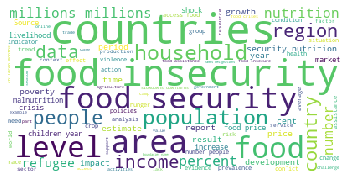

In [16]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                          background_color='white',
                         
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(listToStr))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [17]:

tf_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=None,ngram_range=(2,3))
tf = tf_vectorizer.fit_transform(tokens_without_sw)
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

00 50  00 50 11230position  00 80  00 80 10  01 05  01 05 pdf  01 08  \
0          0                    0      0         0      0          0      0   
1          0                    0      0         0      0          0      0   
2          0                    0      0         0      0          0      0   
3          0                    0      0         0      0          0      0   
4          0                    0      0         0      0          0      0   
...      ...                  ...    ...       ...    ...        ...    ...   
58242      0                    0      0         0      0          0      0   
58243      0                    0      0         0      0          0      0   
58244      0                    0      0         0      0          0      0   
58245      0                    0      0         0      0          0      0   
58246      0                    0      0         0      0          0      0   

       01 51  01 51 00  02 52  ...  ł4 41  ł4 41 7sudanłłłdownturn  \
0          0         0      0  ...      0                        0   
1          0         0      0  ...      0                        0   
2          0         0      0  ...      0                        0   
3          0         0      0  ...      0                        0   
4          0         0      0  ...      0                        0   
...      ...       ...    ...  ...    ...                      ...   
58242      0         0      0  ...      0                        0   
58243      0         0      0  ...      0                        0   
58244      0         0      0  ...      0                        0   
58245      0         0      0  ...      0                        0   
58246      0         0      0  ...      0                        0   

       ˆgur million  ˆles resources  ˆles resources iom  ˆve year  \
0                 0               0                   0         0   
1                 0               0                   0         0   
2                 0               0                   0         0   
3                 0               0                   0         0   
4                 0               0                   0         0   
...             ...             ...                 ...       ...   
58242             0               0                   0         0   
58243             0               0                   0         0   
58244             0               0                   0         0   
58245             0               0                   0         0   
58246             0               0                   0         0   

       ˆve year average  ˇare ups  ˇash 29  ˇash 29 july  
0                     0         0        0             0  
1                     0         0        0             0  
2                     0         0        0             0  
3                     0         0        0             0  
4                     0         0        0             0  
...                 ...       ...      ...           ...  
58242                 0         0        0             0  
58243                 0         0        0             0  
58244                 0         0        0             0  
58245                 0         0        0             0  
58246                 0         0        0             0  

[58247 rows x 1679 columns]

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(tokens_without_sw)
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})


In [19]:
df_ngram.head(10)

frequency                          bigram/trigram
0         28                        commodity export
1         27                           worldbank org
2         25                      regions subregions
3         23                        commodity import
4         19                         food insecurity
5         16                                  un org
6         16                                  org en
7         15                          asylum seekers
8         13          subregions countriesprevalence
9         13  regions subregions countriesprevalence

In [20]:
df_ngram['polarity'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram['subjective'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)

In [21]:
df_ngram

frequency       bigram/trigram  polarity  subjective
0            28     commodity export       0.0         0.0
1            27        worldbank org       0.0         0.0
2            25   regions subregions       0.0         0.0
3            23     commodity import       0.0         0.0
4            19      food insecurity       0.0         0.0
...         ...                  ...       ...         ...
1527          1                01 05       0.0         0.0
1528          1             00 80 10       0.0         0.0
1529          1                00 80       0.0         0.0
1530          1  00 50 11230position       0.0         0.0
1531          1                00 50       0.0         0.0

[1532 rows x 4 columns]

In [22]:
lda_model = LatentDirichletAllocation(n_components=3, learning_method='batch', max_iter=5, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
commodity import food insecurity sub saharan food crisis who int meta analysis mod sev int gho apps who int who int gho
Topic 1:
regions subregions well being below average subregions countriesprevalence regions subregions countriesprevalence subregions countriesnumber regions subregions countriesnumber topic nutrition two thirds fao org
Topic 2:
commodity export worldbank org asylum seekers un org org en con ict www worldbank worldbank org en www worldbank org un org unsd


In [23]:
import pyLDAvis.sklearn


In [24]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
panel

of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.
 [_prepare.py:257]


PreparedData(topic_coordinates=                 x           y  topics  cluster       Freq
topic                                                     
2      -632.045471 -384.325073       1        1  36.975305
1     -1209.665405  212.164124       2        1  33.788312
0     -1437.453247 -586.322510       3        1  29.236383, topic_info=     Category       Freq                                                Term  \
511   Default  18.000000                                    commodity export   
1324  Default  15.000000                                  regions subregions   
514   Default  13.000000                                    commodity import   
832   Default  11.000000                                     food insecurity   
1564  Default  12.000000                                          well being   
...       ...        ...                                                 ...   
822    Topic3   1.935362  financial_crisis financialcrisis_report_200902 pdf   
823    Topic3   1.935362                   financialcrisis_report_200902 pdf   
1482   Topic3   1.935362                             topics financial_crisis   
1571   Topic3   4.879588                                             who int   
834    Topic3   2.519286                                       food security   

          Total  loglift  logprob  
511   18.000000  30.0000  30.0000  
1324  15.000000  29.0000  29.0000  
514   13.000000  28.0000  28.0000  
832   11.000000  27.0000  27.0000  
1564  12.000000  26.0000  26.0000  
...         ...      ...      ...  
822    2.349669   1.0358  -5.9778  
823    2.349669   1.0358  -5.9778  
1482   2.349669   1.0358  -5.9778  
1571   8.294962   0.6992  -5.0531  
834    3.562899   0.8832  -5.7141  

[125 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
386       1  0.795468      above average
437       3  0.856053           apps who
438       3  0.856053       apps who int
451       1  0.990133     asylum seekers
464       2  0.985808      below average
...     ...       ...                ...
1604      2  0.986812        www fao org
1631      2  0.939038            www who
1632      2  0.821700        www who int
1635      1  0.924886      www worldbank
1636      1  1.009273  www worldbank org

[99 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])